In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from global_land_mask import globe
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [2]:
#Subscript
normal = 'max'
sub_s = "ₘₐₓ"
x = 'max'
res = x.maketrans(''.join(normal), ''.join(sub_s))
sub = x.translate(res)

In [3]:
path = '/media/rakshith/Seagate Expansion Drive/Good models/'
model = 'INM-CM5-0'

In [170]:
model = 'MIROC6'

In [198]:
model = 'CMCC-CM2-SR5'

In [4]:
d = xr.open_mfdataset(path+model+'/Vertical velocity/wap*.nc')

In [5]:
d2 = d.sel(lat=slice(10, 30), lon=slice(70,90))

In [6]:
lon_grid1, lat_grid1 = np.meshgrid(d2.lon, d2.lat)
mask2 = globe.is_land(lat_grid1, lon_grid1)

In [7]:
d3 = d2.wap.where(mask2>0).mean(dim=['lat', 'lon']).squeeze()

In [8]:
jjas = d3.time.dt.month.isin(range(6,10))
clim = d3.sel(time=jjas)
clim2 = clim.groupby('time.year').mean('time')

In [9]:
time1 = np.arange(1990, 2011, 1)
time2 = np.arange(2070, 2091, 1)

In [10]:
timereq = np.append(time1, time2)

In [11]:
levels = clim2.plev/100

In [12]:
xs = np.linspace(100000, 100, 1000)

In [13]:
period1 = clim2.sel(year=slice('1990', '2010')).mean(dim='year')
period2 = clim2.sel(year=slice('2070', '2090')).mean(dim='year')

p1 = period1.interp(plev=xs, method="cubic")
wmax1 = np.max(abs(p1))
o1 = np.divide(abs(p1), abs(wmax1))

p2 = period2.interp(plev=xs, method="cubic")
wmax2 = np.max(abs(p2))
o2 = np.divide(abs(p2), abs(wmax2))

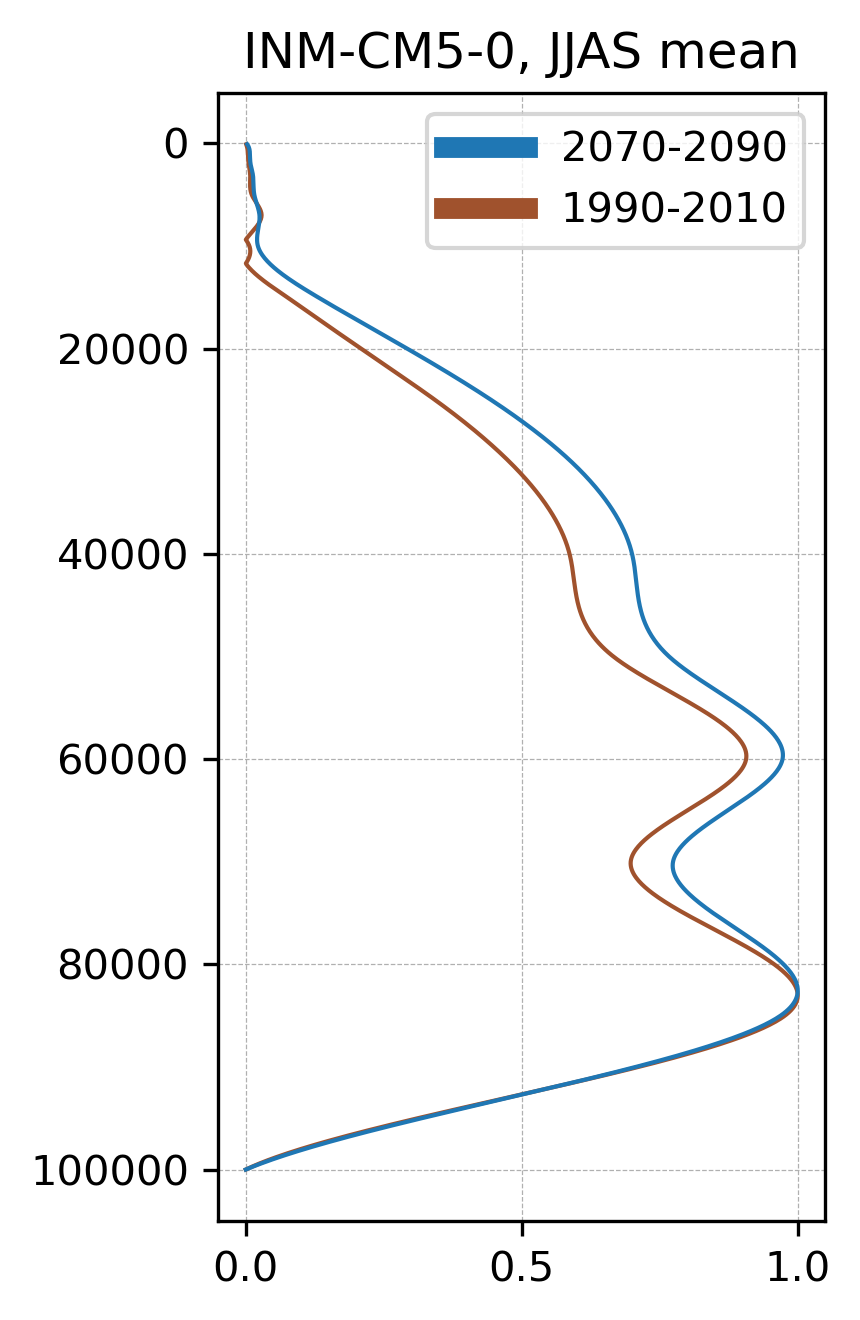

In [15]:
plt.rcParams['figure.figsize'] = [3,4.5]
plt.plot(o1, xs, linewidth=1, c='sienna')
plt.plot(o2, xs, linewidth=1, c='tab:blue')
plt.plot([],[], 'tab:blue', label='2070-2090', linewidth=5)
plt.plot([],[], 'sienna', label='1990-2010', linewidth=5)
plt.grid(linestyle='--', linewidth=0.3)
plt.gca().invert_yaxis()
plt.title(model+', JJAS mean')
plt.legend()
plt.tight_layout()

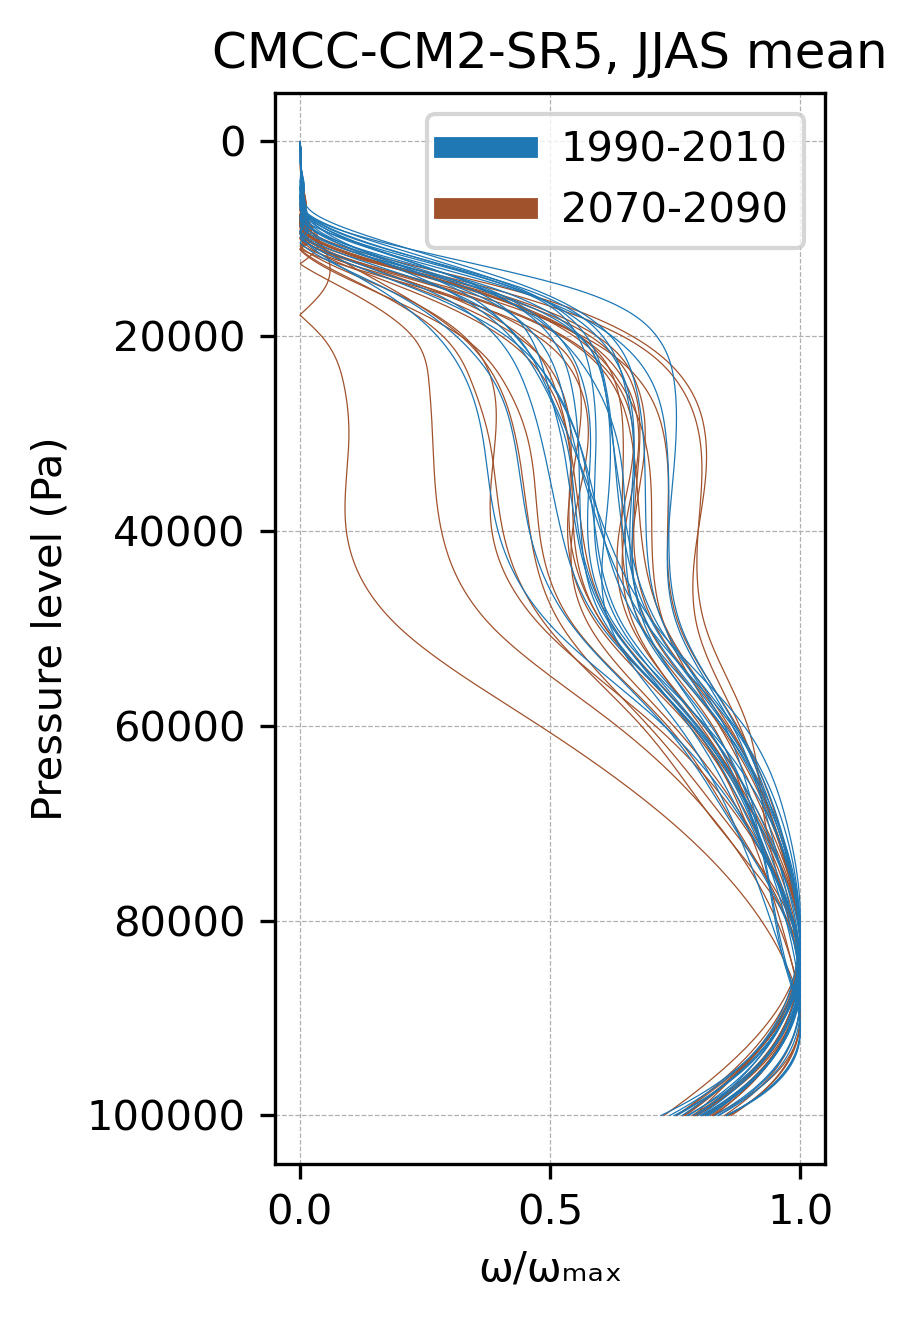

In [110]:
plt.rcParams['figure.figsize'] = [3,4.5]
for j in timereq:
    clim1 = clim2.sel(year=j)
    if j<2070:
        climf = clim1.interp(plev=xs, method="cubic")
        wmax1 = np.max(abs(climf))
        om1 = np.divide(abs(climf), abs(wmax1))
        plt.plot(om1, xs, linewidth=0.3, c='sienna')
        plt.grid(linestyle='--', linewidth=0.3)
    if j>2010:
        climf = clim1.interp(plev=xs, method="cubic")
        wmax1 = np.max(abs(climf))
        om1 = np.divide(abs(climf), abs(wmax1))
        plt.plot(om1, xs, linewidth=0.3, c='tab:blue')
    
plt.plot([],[], 'tab:blue', label='2070-2090', linewidth=5)
plt.plot([],[], 'sienna', label='1990-2010', linewidth=5)
plt.legend()    
plt.xlabel('\u03C9/\u03C9'+sub)
plt.ylabel('Pressure level (Pa)')
plt.gca().invert_yaxis()
plt.title(model+', JJAS mean')
plt.tight_layout()

In [3]:
g = 9.80616 #Avg. gravity acceleration on Earth
Cp = 1004.64 #Specific heat at constant pressure for dry air
Lv = 2.501e6 #Latent heat of vaporization for liquid water at 0C

In [4]:
path = '/media/rakshith/Seagate Expansion Drive/mraks/ERA TGMS all variables India.nc'
ds2 = xr.open_dataset(path)

lon_grid1, lat_grid1 = np.meshgrid(ds2.longitude, ds2.latitude)
mask2 = globe.is_land(lat_grid1, lon_grid1)

In [5]:
ds3 = ds2.where(mask2>0).mean(dim=['latitude', 'longitude']).squeeze()

In [8]:
ds4 = ds3.sel(level=slice(100, 1000))

In [9]:
xs= np.arange(100, 1001, 1)
Y = np.arange(100,1001, 100)

In [10]:
m = Cp*ds4.t + Lv*ds4.q + ds4.z

In [11]:
MSE = m.groupby('time.year').mean('time')

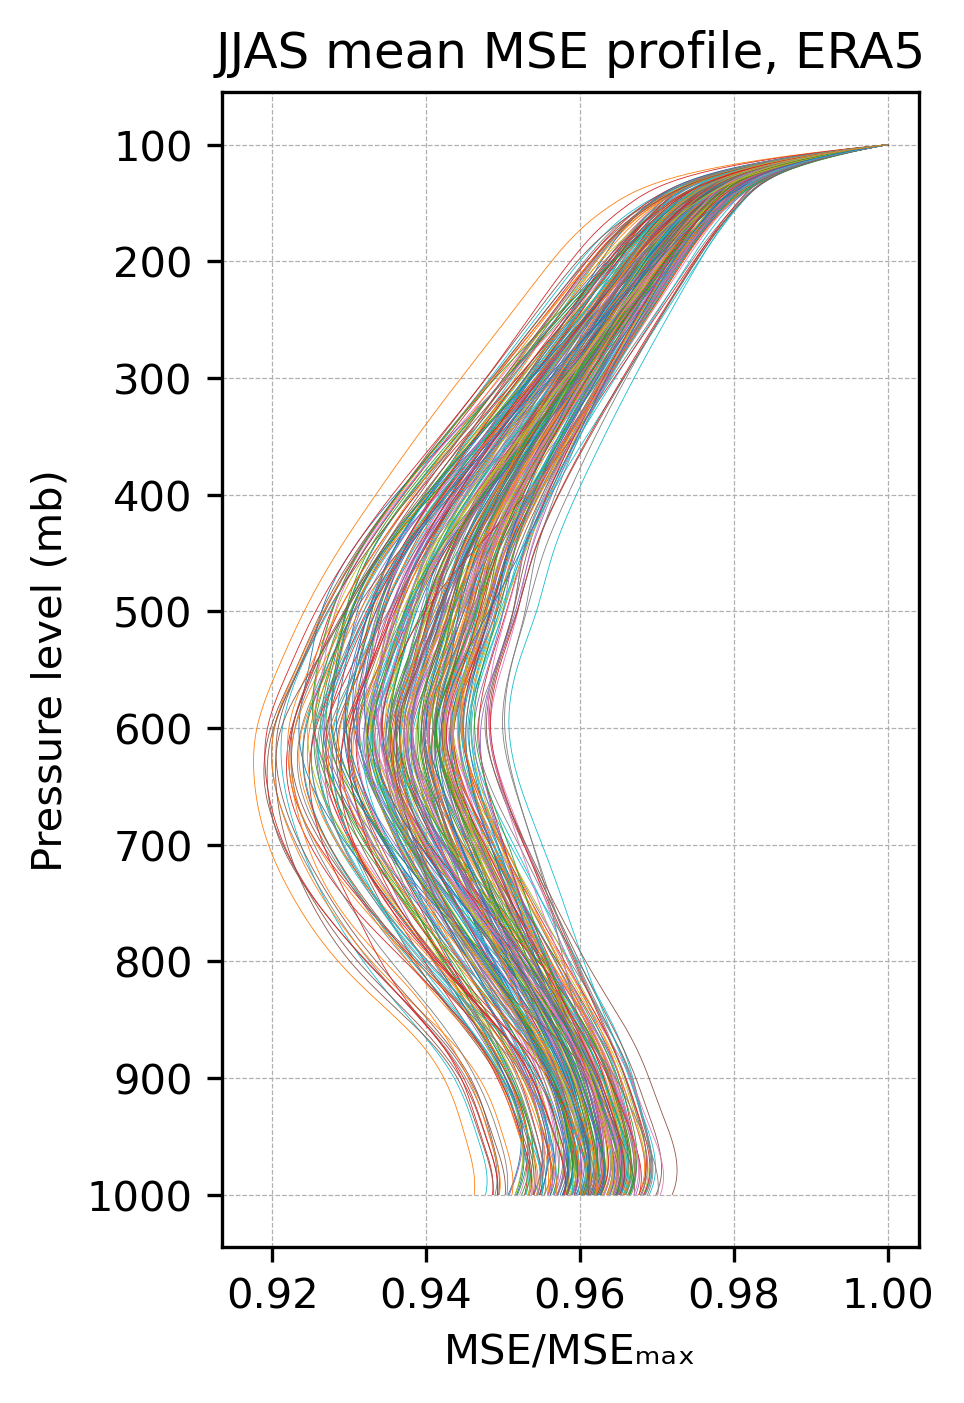

In [19]:
plt.rcParams['figure.figsize'] = [3,5]
for i in m.time:
    Msel = m.sel(time=i)
    Msel = Msel.interp(level=xs, method="cubic")
    mmax1 = np.max(abs(Msel))
    om1 = np.divide(abs(Msel), abs(mmax1))
    plt.plot(om1, xs, linewidth=0.2)
    plt.grid(linestyle='--', linewidth=0.3)
    
plt.yticks(Y)
plt.ylabel('Pressure level (mb)')
plt.xlabel('MSE/MSE'+sub)
plt.gca().invert_yaxis()
plt.title('JJAS mean MSE profile, ERA5')
plt.show()

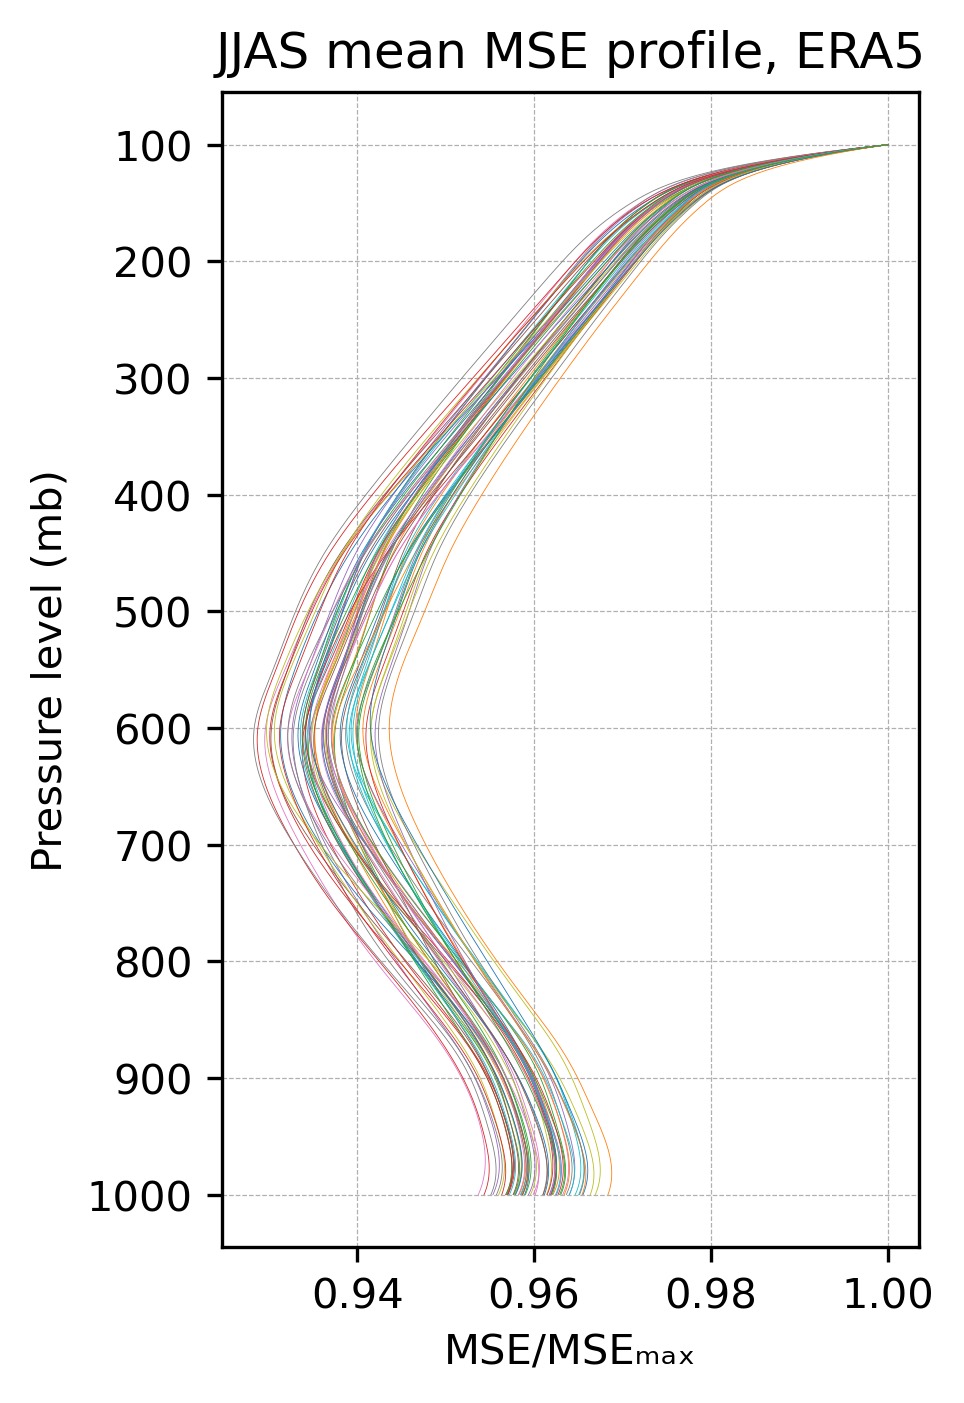

In [18]:
plt.rcParams['figure.figsize'] = [3,5]
for i in MSE.year:
    Msel = MSE.sel(year=i)
    Msel = Msel.interp(level=xs, method="cubic")
    mmax1 = np.max(abs(Msel))
    om1 = np.divide(abs(Msel), abs(mmax1))
    plt.plot(om1, xs, linewidth=0.2)
    plt.grid(linestyle='--', linewidth=0.3)
    
plt.yticks(Y)
plt.ylabel('Pressure level (mb)')
plt.xlabel('MSE/MSE'+sub)
plt.gca().invert_yaxis()
plt.title('JJAS mean MSE profile, ERA5')
plt.show()

In [ ]:
Y = np.arange(0,1001, 100)
xs= np.arange(1, 1001, 1)
fig, ax = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(9, 4.5))
for j in range(6, 10):
    month = j
    july = ds3.time.dt.month.isin(month)
    climf = ds3.sel(time=july)
    plt.subplot(1,4,j-5)
    for i in climf.time:
        clim1 = climf.sel(time=i)
        wmax1 = np.max(abs(clim1))
        om1 = np.divide(abs(clim1), abs(wmax1))
        om1 = om1.interp(level=xs, method="cubic")
        plt.plot(om1, xs, linewidth=0.3)
        plt.grid(linestyle='--', linewidth=0.3)
        plt.title(m[j-6])
        plt.ylim(0, 1000)
    
fig.text(0.5, -0.01, '\u03C9/\u03C9' + sub, ha='center')
fig.text(-0.01, 0.5, 'Pressure level (mb)', va='center', rotation='vertical')
plt.yticks(Y)
plt.gca().invert_yaxis()
plt.suptitle('ERA5, Indian land region, 1959-2021')
plt.tight_layout()